In [1]:
import scipy.io as sio
from scipy.fft import fft
import os,glob
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mat4py import loadmat
import signal_utll

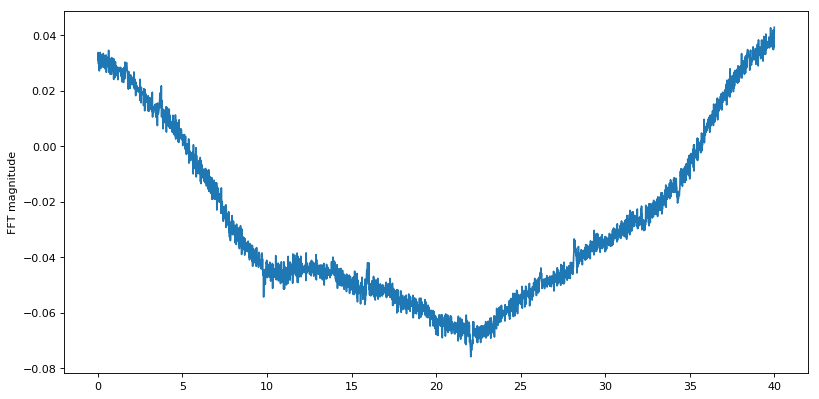

In [2]:
Hz_Lthr, Hz_Hthr =0, 40
file = '../datasets/Age_A/Age_A_Female/Sub 25/25Neck_L_A_1.mat'
[X,y] =  signal_utll.wfft_hz(file, Hz_Lthr, Hz_Hthr)
Y = signal_utll.remove_trends_from_signal(X, y)
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(X, Y)
plt.ylabel('FFT magnitude')
plt.show()

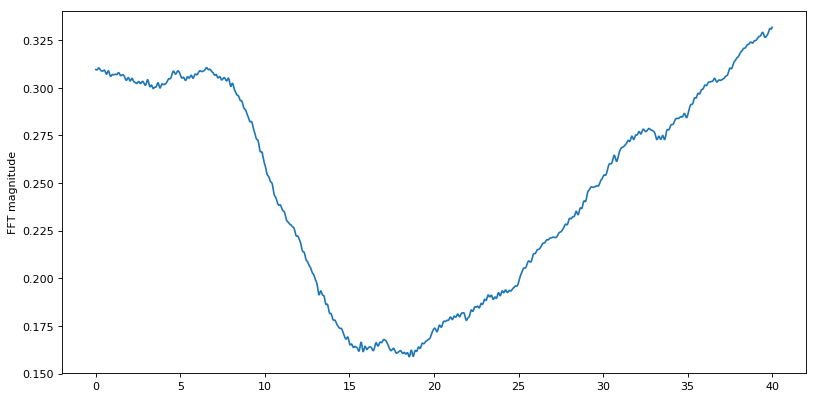

In [3]:
file = '../datasets/Age_A/Age_A_Male/Sub 73/73Neck_R_A_2 .mat'
[X,y] =  signal_utll.wfft_hz(file, Hz_Lthr, Hz_Hthr)
Y = signal_utll.remove_trends_from_signal(X, y)
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(X, Y)
plt.ylabel('FFT magnitude')
plt.show()

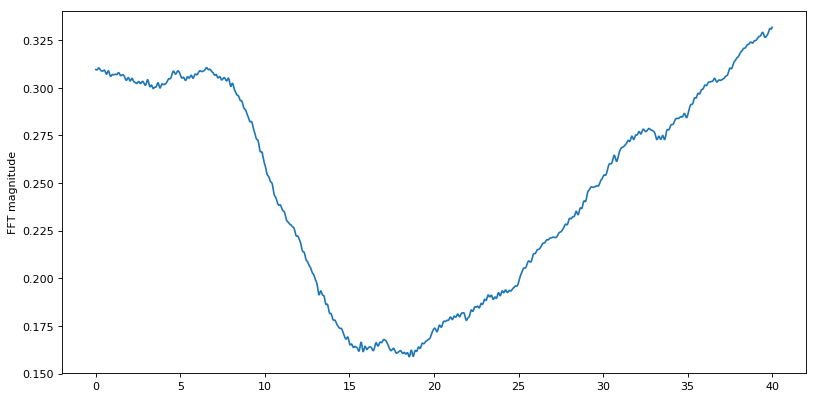

In [4]:
file = '../datasets/Age_A/Age_A_Female/Sub 28/28Neck_L_A_1.mat'
Y = signal_utll.remove_trends_from_signal(X, y)
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(X, Y)
plt.ylabel('FFT magnitude')
plt.show()

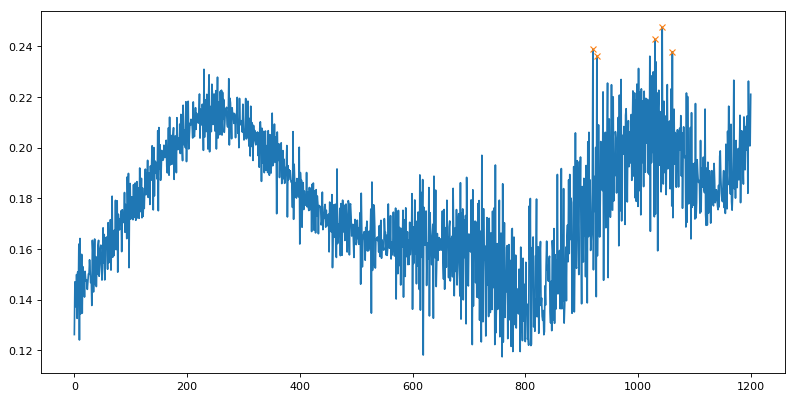

In [6]:
import heapq
Hz_Lthr, Hz_Hthr, number_of_elements =  0, 20, 5
file = '../datasets/Age_A/Age_A_Male/Sub 36/36Neck_L_A_1.mat'
[X,y] =  signal_utll.wfft_hz(file, Hz_Lthr, Hz_Hthr)
# remove the trend
Y = signal_utll.remove_trends_from_signal(X,y)
peaks, _ = signal_utll.find_peaks(Y, height=0)

top_ten_peaks = heapq.nlargest(number_of_elements, Y[peaks])

top_ten_peaks_index = [index[0] for index in [np.where(Y == peak)[0] for peak in top_ten_peaks]]
top_ten_peaks_index.sort()


plt.figure(figsize=(12, 6), dpi=80)
plt.plot(Y)
plt.plot(top_ten_peaks_index, Y[top_ten_peaks_index], "x")
plt.show()


In [7]:
[X[peak]*60 for peak in top_ten_peaks_index]

[920.0, 927.0000000000001, 1030.0, 1043.0, 1061.0]

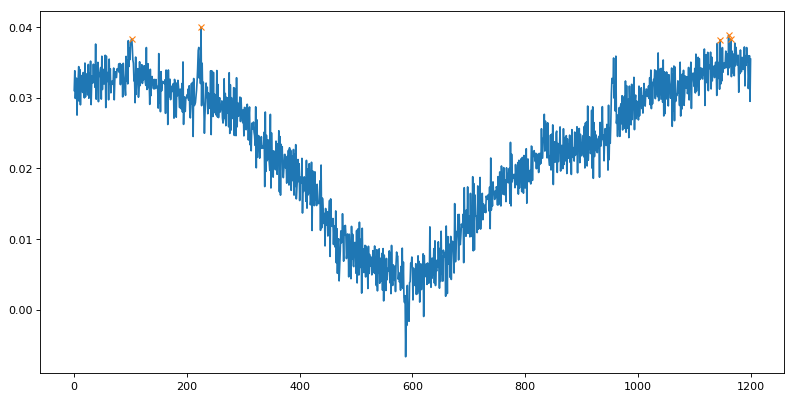

In [9]:
file = '../datasets/Age_A/Age_A_Female/Sub 25/25Neck_L_A_1.mat'
[X,y] =  signal_utll.wfft_hz(file, Hz_Lthr, Hz_Hthr)
# remove the trend
Y = signal_utll.remove_trends_from_signal(X,y)
peaks, _ = signal_utll.find_peaks(Y, height=0)

top_ten_peaks = heapq.nlargest(number_of_elements, Y[peaks])

top_ten_peaks_index = [index[0] for index in [np.where(Y == peak)[0] for peak in top_ten_peaks]]
top_ten_peaks_index.sort()


plt.figure(figsize=(12, 6), dpi=80)
plt.plot(Y)
plt.plot(top_ten_peaks_index, Y[top_ten_peaks_index], "x")
plt.show()


In [10]:
[X[peak]*60 for peak in top_ten_peaks_index]

[102.0, 225.00000000000003, 1146.0, 1161.0, 1165.0]

In [11]:
def find_hr_without_weight(file, Hz_Lthr, Hz_Hthr, no_peaks):
    [X,y] = signal_utll.wfft_hz(file, Hz_Lthr, Hz_Hthr)
    Y = signal_utll.remove_trends_from_signal(X,y)
    peaks, _ = signal_utll.find_peaks(Y, height=0)
    top_peaks = heapq.nlargest(no_peaks, Y[peaks])
    top_peaks_index = [index[0] for index in [np.where(Y == peak)[0] for peak in top_peaks]]
    top_peaks_index.sort()
    hr_on_peaks = [round(X[peak]*60) for peak in top_peaks_index]
    return hr_on_peaks

In [20]:
files_25 = ['../datasets/Age_A/Age_A_Female/Sub 25/25Neck_L_A_1.mat',
        '../datasets/Age_A/Age_A_Female/Sub 25/25Neck_L_A_2.mat',
        '../datasets/Age_A/Age_A_Female/Sub 25/25Neck_L_A_3.mat',
        '../datasets/Age_A/Age_A_Female/Sub 25/25Neck_R_A_1.mat',
        '../datasets/Age_A/Age_A_Female/Sub 25/25Neck_R_A_2.mat',
        '../datasets/Age_A/Age_A_Female/Sub 25/25Neck_R_A_3.mat']

all_peaks_hr = []
Hz_Lthr, Hz_Hthr, no_peaks = 0, 10, 5
for  file in files_25:
    hr_on_peaks = find_hr_without_weight(file, Hz_Lthr, Hz_Hthr, no_peaks)
    all_peaks_hr.append(hr_on_peaks)
    print(hr_on_peaks)

[221.0, 225.0, 253.0, 275.0, 288.0]
[203.0, 205.0, 324.0, 349.0, 352.0]
[10.0, 184.0, 575.0, 578.0, 587.0]
[404.0, 429.0, 436.0, 458.0, 478.0]
[449.0, 497.0, 533.0, 566.0, 593.0]
[2.0, 4.0, 6.0, 8.0, 10.0]


In [21]:
flat_list = [item for sublist in all_peaks_hr for item in sublist]

In [22]:
signal_utll.do_clusters_and_find_max_center(flat_list, 5)

450.1428571428571

In [23]:
files_36 = ['../datasets/Age_A/Age_A_Male/Sub 36/36Neck_L_A_1.mat',
        '../datasets/Age_A/Age_A_Male/Sub 36/36Neck_L_A_2.mat',
        '../datasets/Age_A/Age_A_Male/Sub 36/36Neck_L_A_3.mat',
        '../datasets/Age_A/Age_A_Male/Sub 36/36Neck_R_A_1.mat',
        '../datasets/Age_A/Age_A_Male/Sub 36/36Neck_R_A_2.mat',
        '../datasets/Age_A/Age_A_Male/Sub 36/36Neck_R_A_3.mat']


all_peaks_hr = []

for  file in files_36:
    hr_on_peaks = signal_utll.find_hr_without_weight(file, Hz_Lthr, Hz_Hthr, no_peaks)
    all_peaks_hr.append(hr_on_peaks)
    print(hr_on_peaks)

[230.0, 239.0, 244.0, 254.0, 274.0]
[221.0, 545.0, 556.0, 565.0, 581.0]
[2.0, 240.0, 242.0, 348.0, 362.0]
[2.0, 6.0, 23.0, 46.0, 54.0]
[11.0, 24.0, 45.0, 169.0, 307.0]
[262.0, 286.0, 444.0, 570.0, 572.0]


In [24]:
flat_list = [item for sublist in all_peaks_hr for item in sublist]
signal_utll.do_clusters_and_find_max_center(flat_list, 5)

237.5